In [91]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [92]:
import pandas as pd
train = pd.read_csv('digit-recognizer/train.csv')
x_train = train.iloc[:,1:]
y_train = train.iloc[:,0]
x_test = pd.read_csv('digit-recognizer/test.csv')

In [93]:
x_train.shape,y_train.shape

((42000, 784), (42000,))

In [94]:
x_test.shape

(28000, 784)

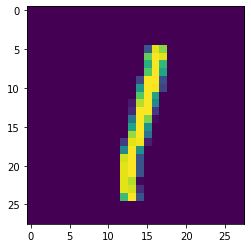

In [95]:
from matplotlib import pyplot as plt
plt.imshow(x_train.values.reshape(42000,28,28)[96])
plt.show()

In [96]:
model = Sequential()
model.add(Dense(units = 512,input_dim = 28*28 , activation = 'relu' ))
model.add(Dense(units = 128, activation = 'relu' ))
model.add(Dense(units = 64, activation = 'sigmoid' ))
model.add(Dense(units = 32, activation = 'sigmoid' ))
model.add(Dense(units = 10, activation = 'softmax' ))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [98]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)

In [99]:
model.fit(x_train,y_train,epochs=10,batch_size = 100)

Epoch 1/10
420/420 [==============================] - 2s 6ms/step - loss: 0.6845 - accuracy: 0.9005
Epoch 2/10
420/420 [==============================] - 2s 5ms/step - loss: 0.1659 - accuracy: 0.9647
Epoch 3/10
420/420 [==============================] - 2s 5ms/step - loss: 0.0969 - accuracy: 0.9770
Epoch 4/10
420/420 [==============================] - 2s 5ms/step - loss: 0.0642 - accuracy: 0.9845
Epoch 5/10
420/420 [==============================] - 2s 5ms/step - loss: 0.0488 - accuracy: 0.9878
Epoch 6/10
420/420 [==============================] - 2s 5ms/step - loss: 0.0378 - accuracy: 0.9903
Epoch 7/10
420/420 [==============================] - 2s 5ms/step - loss: 0.0309 - accuracy: 0.9919
Epoch 8/10
420/420 [==============================] - 2s 5ms/step - loss: 0.0257 - accuracy: 0.9930
Epoch 9/10
420/420 [==============================] - 2s 5ms/step - loss: 0.0220 - accuracy: 0.9943
Epoch 10/10
420/420 [==============================] - 2s 5ms/step - loss: 0.0232 - accuracy: 0.9937

In [100]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [101]:
df = pd.DataFrame({
    'ImageId' : [i for i in range(1,28001,1)],
    'Label' : model.predict_classes(x_test)
})

In [103]:
df.to_csv('digit-recognizer/Predictions.csv',index=False)